In [73]:
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil import tz
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.dates import DateFormatter

In [2]:
df_502_raw = pd.read_csv('502-data-2019-02-19.csv', header=None)
df_503_raw = pd.read_csv('503-data-2019-02-19.csv', header=None)

In [3]:
df_502_raw.head()

,0,1,2
0,502,Tue Feb 19 2019 00:02:23 GMT+0000 (UTC),Detection Box (00100010 10111010 00100010 1111...
1,502,Tue Feb 19 2019 00:02:25 GMT+0000 (UTC),Detection Box (00100010 10111010 00100010 1111...
2,502,Tue Feb 19 2019 00:17:12 GMT+0000 (UTC),Detection Box (00100010 10111010 00100010 1111...
3,502,Tue Feb 19 2019 00:17:14 GMT+0000 (UTC),Detection Box (00100010 10111010 00100010 1111...
4,502,Tue Feb 19 2019 00:17:16 GMT+0000 (UTC),Detection Box (00100010 10111010 00100010 1111...


In [4]:
df_503_raw.head()

,0,1,2
0,503,Tue Feb 19 2019 00:00:01 GMT+0000 (UTC),Detection Box (00100010 01101000)
1,503,Tue Feb 19 2019 00:00:21 GMT+0000 (UTC),Detection Box (01100110 01100000)
2,503,Tue Feb 19 2019 00:00:23 GMT+0000 (UTC),Detection Box (01100110 01100000)
3,503,Tue Feb 19 2019 00:00:24 GMT+0000 (UTC),Detection Box (01100110 01100100)
4,503,Tue Feb 19 2019 00:00:26 GMT+0000 (UTC),Detection Box (01100110 01100000)


# Format and Parse Data

In [5]:
# format of timestamps
t_format = '%b %d %Y %H:%M:%S'
from_zone = tz.gettz('UTC')
to_zone = tz.gettz('America/New_York')

In [6]:
# function to reformat timestamps
def t_rfmt(timestamp):
    # read as datetime object
    tm = datetime.strptime(timestamp, t_format)
    # return datetime converted to local timezone
    return(tm.replace(tzinfo=from_zone).astimezone(to_zone))

In [7]:
# function to parse input by each wire
def wires(reading):
    wire_list = []
    for group in reading.split():
        wire_list.extend(list(group))
    return(wire_list)

In [8]:
# 502 column headers
category = ['phase'] * 8 + ['ped'] * 8 + ['loop'] * 8 + ['button'] * 8
sub_cat = [str(x) for x in range(1, 33)]
tup_cat = list(zip(*[category, sub_cat]))
columns = pd.MultiIndex.from_tuples(tup_cat)

In [9]:
# input sensor data as individual columns
df_502 = pd.DataFrame(list(df_502_raw.loc[:, 2].apply(lambda x: wires(x[15:-1]))), columns=columns)
# convert data type to integers
df_502 = df_502.astype(int)
# insert column for timestamp
df_502.insert(0, 'timestamp', df_502_raw.loc[:, 1].apply(lambda x: t_rfmt(x[4:-15])))
df_502.head()

timestamp phase                      ped ... loop    button  \
                                1  2  3  4  5  6  7  8   9 ...   23 24     25   
0 2019-02-18 19:02:23-05:00     0  0  1  0  0  0  1  0   1 ...    1  0      1   
1 2019-02-18 19:02:25-05:00     0  0  1  0  0  0  1  0   1 ...    1  0      1   
2 2019-02-18 19:17:12-05:00     0  0  1  0  0  0  1  0   1 ...    1  0      1   
3 2019-02-18 19:17:14-05:00     0  0  1  0  0  0  1  0   1 ...    1  0      1   
4 2019-02-18 19:17:16-05:00     0  0  1  0  0  0  1  0   1 ...    1  0      1   

                        
  26 27 28 29 30 31 32  
0  1  1  1  1  1  1  1  
1  1  1  1  1  1  1  1  
2  1  1  1  1  1  1  1  
3  1  1  1  1  1  1  1  
4  1  1  1  1  1  1  1  

[5 rows x 33 columns]

In [10]:
# 503 column headers
category = ['phase'] * 8 + ['loop'] * 8
sub_cat = [str(x) for x in range(1, 17)]
tup_cat = list(zip(*[category, sub_cat]))
columns = pd.MultiIndex.from_tuples(tup_cat)

In [11]:
# input sensor data as individual columns
df_503 = pd.DataFrame(list(df_503_raw.loc[:, 2].apply(lambda x: wires(x[15:-1]))), columns=columns)
# convert data type to integers
df_503 = df_503.astype(int)
# insert column for timestamp
df_503.insert(0, 'timestamp', df_503_raw.loc[:, 1].apply(lambda x: t_rfmt(x[4:-15])))
df_503.head()

timestamp phase                      loop                    \
                                1  2  3  4  5  6  7  8    9 10 11 12 13 14 15   
0 2019-02-18 19:00:01-05:00     0  0  1  0  0  0  1  0    0  1  1  0  1  0  0   
1 2019-02-18 19:00:21-05:00     0  1  1  0  0  1  1  0    0  1  1  0  0  0  0   
2 2019-02-18 19:00:23-05:00     0  1  1  0  0  1  1  0    0  1  1  0  0  0  0   
3 2019-02-18 19:00:24-05:00     0  1  1  0  0  1  1  0    0  1  1  0  0  1  0   
4 2019-02-18 19:00:26-05:00     0  1  1  0  0  1  1  0    0  1  1  0  0  0  0   

      
  16  
0  0  
1  0  
2  0  
3  0  
4  0

# No Count Columns

## 502

In [51]:
# iterate through data groups
for group in df_502.columns.get_level_values(0).unique()[1:]:
    # iterate through individual sensors
    for column in df_502[group].columns:
        # prrint sensor and unique values
        print(column, ':', df_502[group][column].unique())
        # determine if sensor is inactive
        if len(df_502[group][column].unique()) < 2:
            # remove inactive sensors from dataframe
            df_502.drop((group, column), axis=1, inplace=True)

1 : [0 1]
2 : [0 1]
3 : [1]
4 : [0 1]
5 : [0 1]
6 : [0 1]
7 : [1]
8 : [0 1]
9 : [1]
10 : [0 1]
11 : [1]
12 : [1]
13 : [1]
14 : [0 1]
15 : [1]
16 : [0 1]
17 : [0 1]
18 : [0]
19 : [1]
20 : [0 1]
21 : [0 1]
22 : [0 1]
23 : [1]
24 : [0 1]
25 : [1]
26 : [1]
27 : [1]
28 : [1]
29 : [1]
30 : [1]
31 : [1]
32 : [1]


In [52]:
df_502.head()

timestamp phase                ped       loop            
                                1  2  4  5  6  8  10 14 16   17 20 21 22 24
0 2019-02-18 19:02:23-05:00     0  0  0  0  0  0   0  0  0    0  0  0  0  0
1 2019-02-18 19:02:25-05:00     0  0  0  0  0  0   0  0  0    0  0  0  0  0
2 2019-02-18 19:17:12-05:00     0  0  0  0  0  0   0  0  0    0  0  0  0  0
3 2019-02-18 19:17:14-05:00     0  0  0  0  0  0   0  0  0    0  0  0  0  0
4 2019-02-18 19:17:16-05:00     0  0  0  0  0  0   0  0  0    0  0  0  0  0

## 503

In [53]:
# iterate through data groups
for group in df_503.columns.get_level_values(0).unique()[1:]:
    # iterate through individual sensors
    for column in df_503[group].columns:
        # prrint sensor and unique values
        print(column, ':', df_503[group][column].unique())
        # determine if sensor is inactive
        if len(df_503[group][column].unique()) < 2:
            # remove inactive sensors from dataframe
            df_503.drop((group, column), axis=1, inplace=True)

1 : [0 1]
2 : [0 1]
3 : [1]
4 : [0 1]
5 : [0 1]
6 : [0 1]
7 : [1]
8 : [0 1]
9 : [0 1]
10 : [1 0]
11 : [1]
12 : [0 1]
13 : [1 0]
14 : [0 1]
15 : [0 1]
16 : [0 1]


In [55]:
df_503.head()

timestamp phase                loop                  
                                1  2  4  5  6  8    9 10 12 13 14 15 16
0 2019-02-18 19:00:01-05:00     0  0  0  0  0  0    0  1  0  1  0  0  0
1 2019-02-18 19:00:21-05:00     0  1  0  0  1  0    0  1  0  0  0  0  0
2 2019-02-18 19:00:23-05:00     0  1  0  0  1  0    0  1  0  0  0  0  0
3 2019-02-18 19:00:24-05:00     0  1  0  0  1  0    0  1  0  0  1  0  0
4 2019-02-18 19:00:26-05:00     0  1  0  0  1  0    0  1  0  0  0  0  0

# Plots

## 502

In [66]:
df_502_plot = df_502.copy()
# replace all 0 values with None
for group in df_502.columns.get_level_values(0).unique()[1:]:
    df_502_plot[group] = df_502_plot[group].replace(to_replace=[0], value=[None])

In [67]:
df_502_plot.head()

timestamp phase                                 ped        \
                                1     2     4     5     6     8    10    14   
0 2019-02-18 19:02:23-05:00  None  None  None  None  None  None  None  None   
1 2019-02-18 19:02:25-05:00  None  None  None  None  None  None  None  None   
2 2019-02-18 19:17:12-05:00  None  None  None  None  None  None  None  None   
3 2019-02-18 19:17:14-05:00  None  None  None  None  None  None  None  None   
4 2019-02-18 19:17:16-05:00  None  None  None  None  None  None  None  None   

         loop                          
     16    17    20    21    22    24  
0  None  None  None  None  None  None  
1  None  None  None  None  None  None  
2  None  None  None  None  None  None  
3  None  None  None  None  None  None  
4  None  None  None  None  None  None

In [70]:
y = df_502_plot['loop']['17']
x = dates.date2num(df_502_plot['timestamp'])

In [74]:
myFmt = DateFormatter("%H")

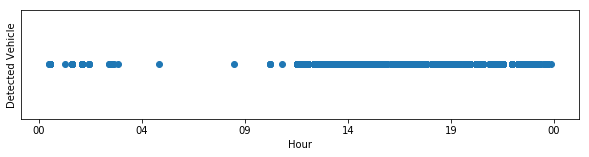

In [79]:
fig, ax = plt.subplots(figsize = (10,2))
ax.scatter(x, y)
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('Detected Vehicle')
ax.set_yticks([])
ax.set_xlabel('Hour');

In [50]:
df_502['timestamp'][0]

Timestamp('2019-02-18 19:02:23-0500', tz='dateutil//usr/share/zoneinfo/America/New_York')

In [34]:
plt_tm = dates.date2num(df_503['timestamp'][:1000])

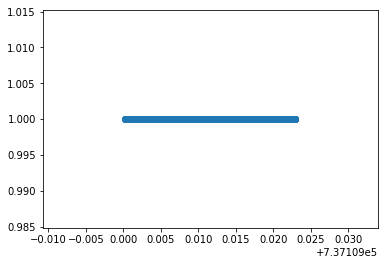

In [52]:
plt.scatter(plt_tm, df_503_plot['phase'][2][:1000])

In [49]:
np.arange(3)

array([0, 1, 2])